In [2]:
library(lattice)

In [2]:
# Help function in R
package ? lattice

In [3]:
#another help function in R
library(help = lattice)

In [3]:
data(environmental)

In [7]:
#get the information of datasets
?environmental

In [4]:
head(environmental)

ozone,radiation,temperature,wind
41,190,67,7.4
36,118,72,8.0
12,149,74,12.6
18,313,62,11.5
23,299,65,8.6
19,99,59,13.8


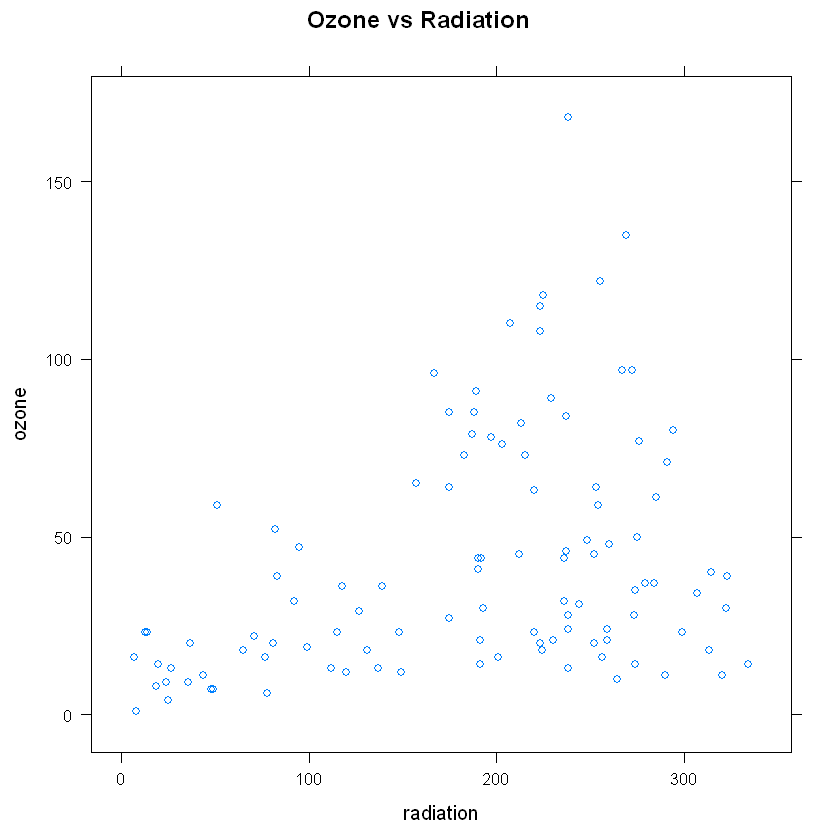

In [5]:
xyplot(ozone ~ radiation, 
           data= environmental, 
           main = 'Ozone vs Radiation')

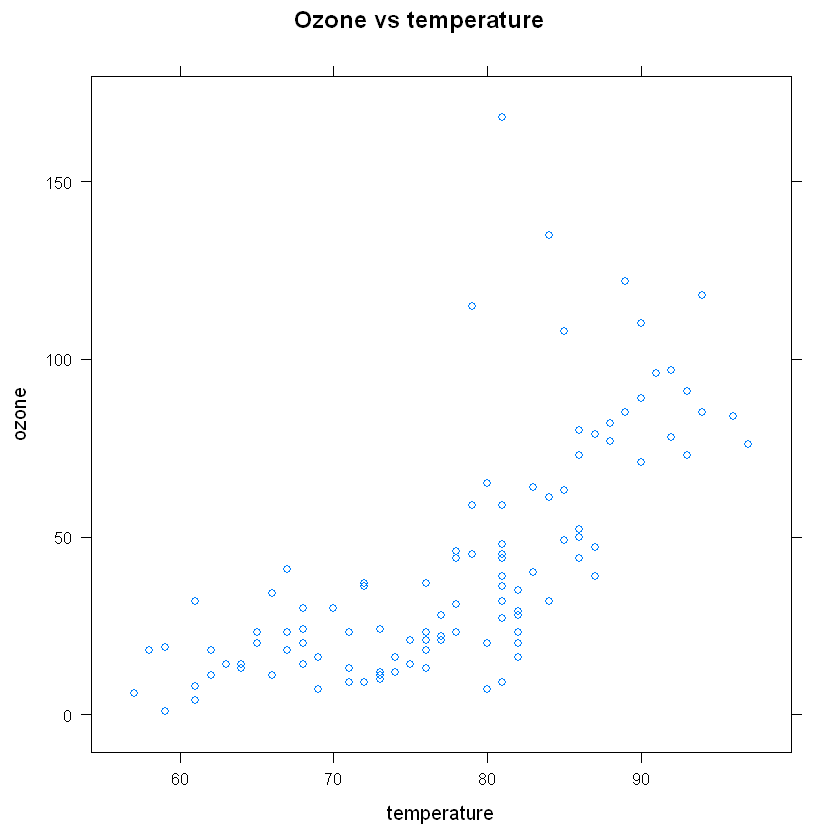

In [6]:
xyplot(ozone ~ temperature, 
           data= environmental, 
           main = 'Ozone vs temperature')

In [7]:
summary(environmental$temperature)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  57.00   71.00   79.00   77.79   84.50   97.00 

In [8]:
# Devide the temperature column's value into 4 sectors.

temp.cut <- equal.count(environmental$temperature, 4)
temp.cut


Data:
  [1] 67 72 74 62 65 59 61 69 66 68 58 64 66 57 68 62 59 73 61 61 67 81 79 76 82
 [26] 90 87 82 77 72 65 73 76 84 85 81 83 83 88 92 92 89 73 81 80 81 82 84 87 85
 [51] 74 86 85 82 86 88 86 83 81 81 81 82 89 90 90 86 82 80 77 79 76 78 78 77 72
 [76] 79 81 86 97 94 96 94 91 92 93 93 87 84 80 78 75 73 81 76 77 71 71 78 67 76
[101] 68 82 64 71 81 69 63 70 75 76 68

Intervals:
   min  max count
1 56.5 76.5    46
2 67.5 81.5    51
3 75.5 86.5    51
4 80.5 97.5    51

Overlap between adjacent intervals:
[1] 27 30 31

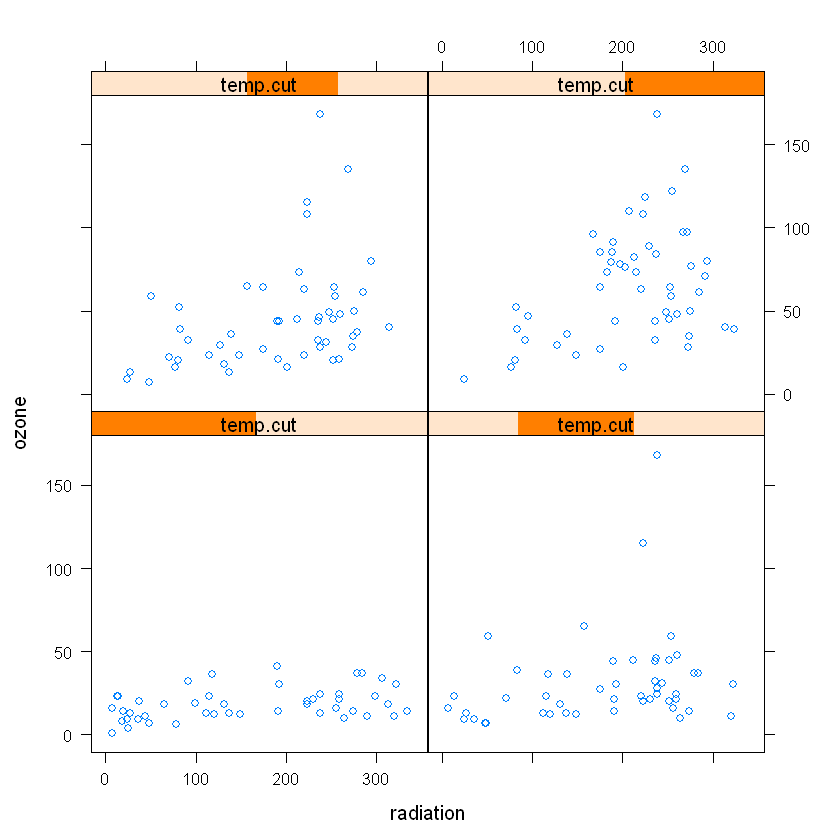

In [9]:
#scatter plot between radiation and ozone conditioning on temperature range

xyplot(ozone ~ radiation | temp.cut, data = environmental)

We can observe there's almost no relationship between radiation and ozone when the temperature is low. However, as temperature goes higher, so does the ozone level. If you want to draw the plots in a row, just type layout =c(1,4) 

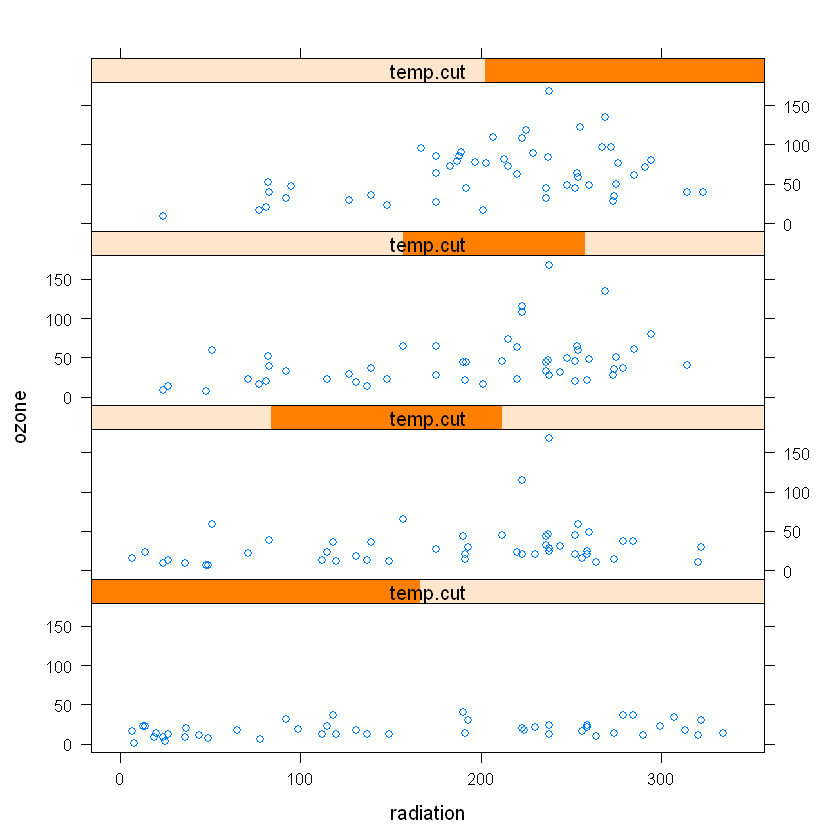

In [13]:
# plotting with 4 rows in 1 columns 
xyplot(ozone ~ radiation|temp.cut, data = environmental, layout= c(1,4))

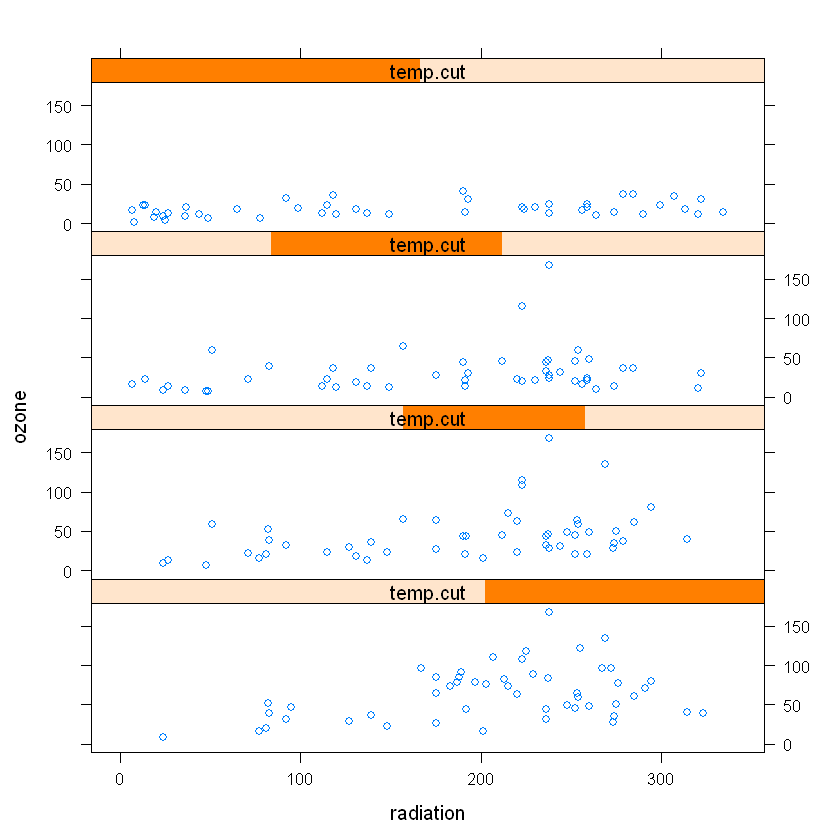

In [15]:
#plotting the same plot with descending order
xyplot(ozone ~ radiation|temp.cut, data = environmental, layout= c(1,4), as.table = TRUE)

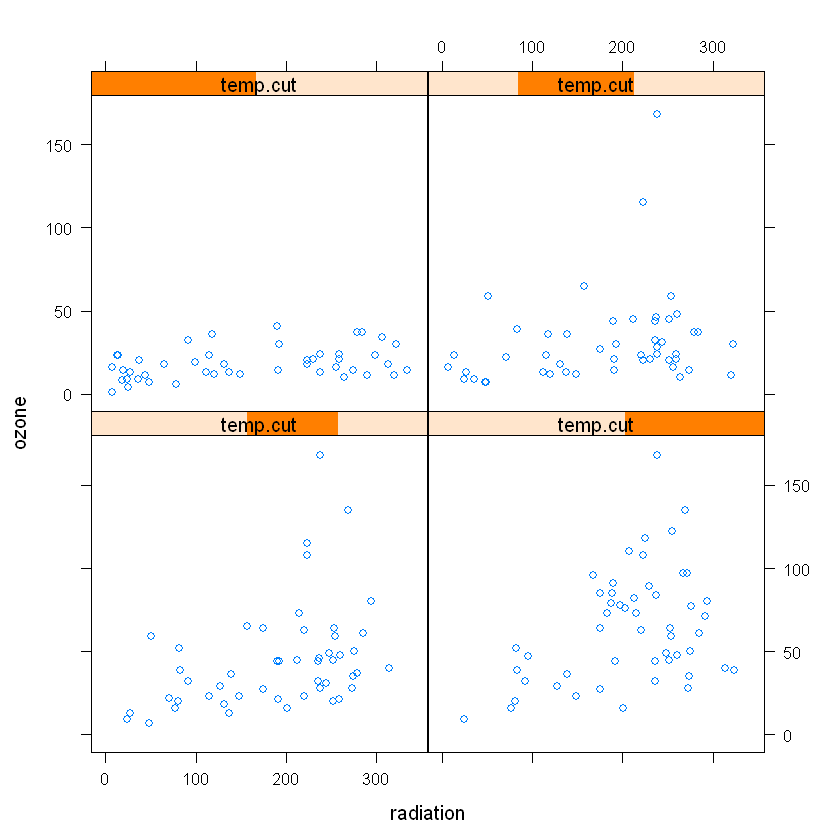

In [16]:
#plotting it with (2,2)
xyplot(ozone ~ radiation|temp.cut, data = environmental, as.table = TRUE)

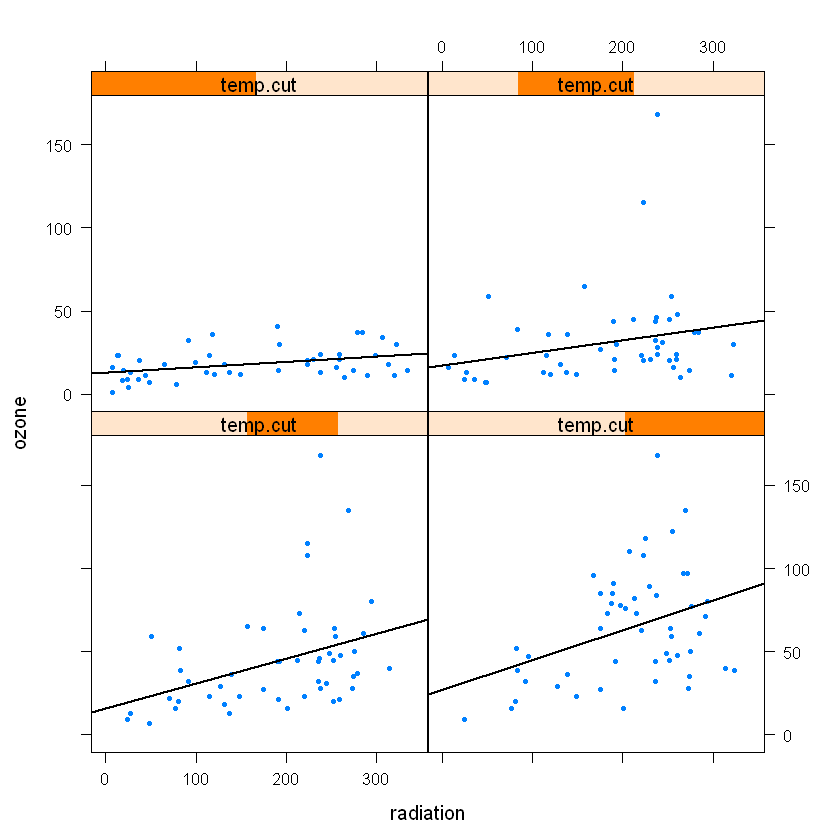

In [33]:
#Now we're going to drawing a linear model to each plot.
#Things we have to do is make a panel and applying linear model into it.

xyplot(ozone ~ radiation|temp.cut, data = environmental, as.table = TRUE,pch=20,
          panel = function(x,y,...){
                      panel.xyplot(x,y, ...)
                      fit <- lm(y~x)
                      panel.abline(fit, lwd=2)
          })

By interpretting the slope of each plot, we can also the effect of temperature to the relationship between radiation and ozone.

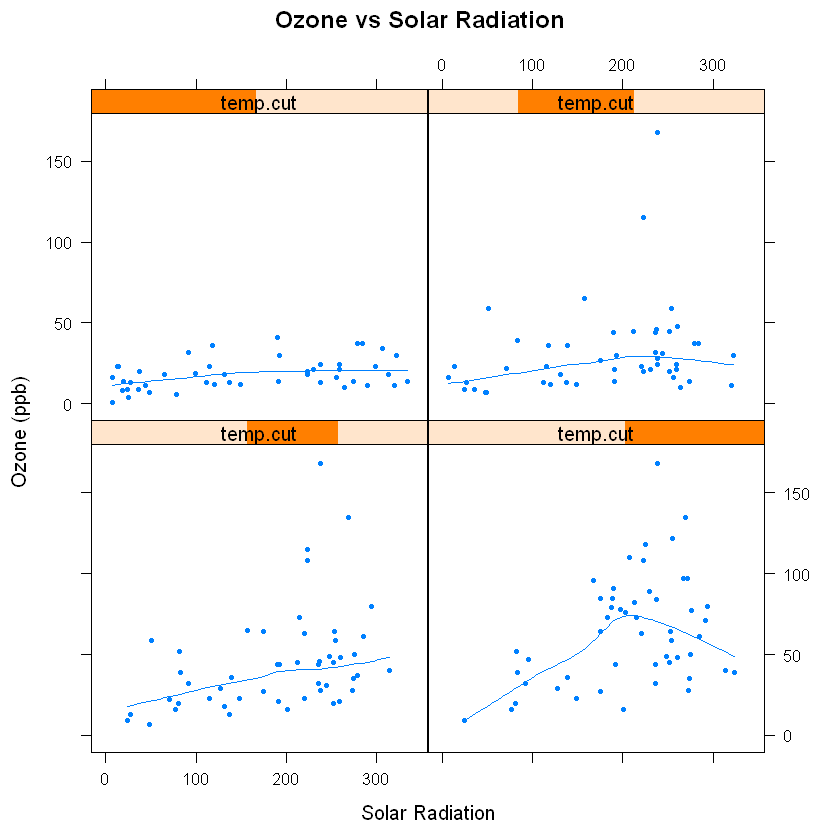

In [40]:
#This time drawing non-linear plots 
xyplot(ozone ~ radiation|temp.cut, data = environmental, as.table = TRUE,pch=20,
          panel = function(x,y,...){
                      panel.xyplot(x,y, ...)
                      panel.loess(x,y) 
          },
         xlab = 'Solar Radiation' , ylab = 'Ozone (ppb)',
         main = 'Ozone vs Solar Radiation')

In [43]:
# Do the same procedures for wind column

wind.cut = equal.count(environmental$wind, 4)
wind.cut


Data:
  [1]  7.4  8.0 12.6 11.5  8.6 13.8 20.1  9.7  9.2 10.9 13.2 11.5 12.0 18.4 11.5
 [16]  9.7  9.7 16.6  9.7 12.0 12.0 14.9  5.7  7.4  9.7 13.8 11.5  8.0 14.9 20.7
 [31]  9.2 11.5 10.3  4.0  9.2  9.2  4.6 10.9  5.1  6.3  5.7  7.4 14.3 14.9 14.3
 [46]  6.9 10.3  6.3  5.1 11.5  6.9  8.6  8.0  8.6 12.0  7.4  7.4  7.4  9.2  6.9
 [61] 13.8  7.4  4.0 10.3  8.0 11.5 11.5  9.7 10.3  6.3  7.4 10.9 10.3 15.5 14.3
 [76]  9.7  3.4  8.0  9.7  2.3  6.3  6.3  6.9  5.1  2.8  4.6  7.4 15.5 10.9 10.3
 [91] 10.9  9.7 14.9 15.5  6.3 10.9 11.5  6.9 13.8 10.3 10.3  8.0 12.6  9.2 10.3
[106] 10.3 16.6  6.9 14.3  8.0 11.5

Intervals:
    min   max count
1  2.05  9.45    49
2  6.65 10.55    50
3  8.95 12.85    47
4 10.05 20.95    53

Overlap between adjacent intervals:
[1] 31 25 32

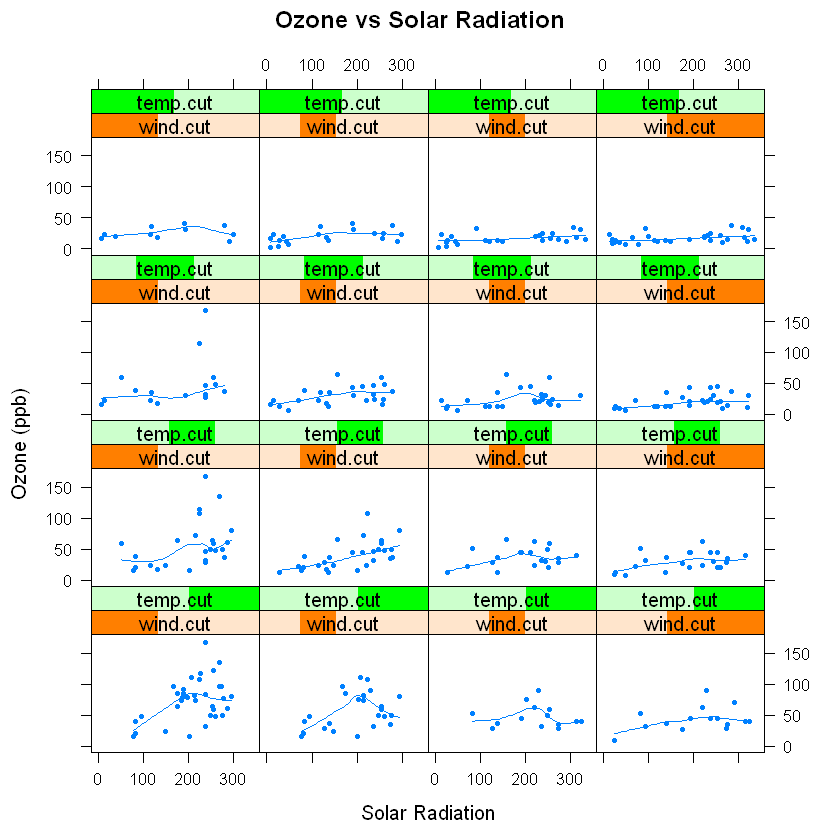

In [45]:
xyplot(ozone ~ radiation|wind.cut * temp.cut, data = environmental, as.table = TRUE,pch=20,
          panel = function(x,y,...){
                      panel.xyplot(x,y, ...)
                      panel.loess(x,y) 
          },
         xlab = 'Solar Radiation' , ylab = 'Ozone (ppb)',
         main = 'Ozone vs Solar Radiation')

The relationship between Solar Radiation and Ozone is observed strongly when little wind and high temperature. 

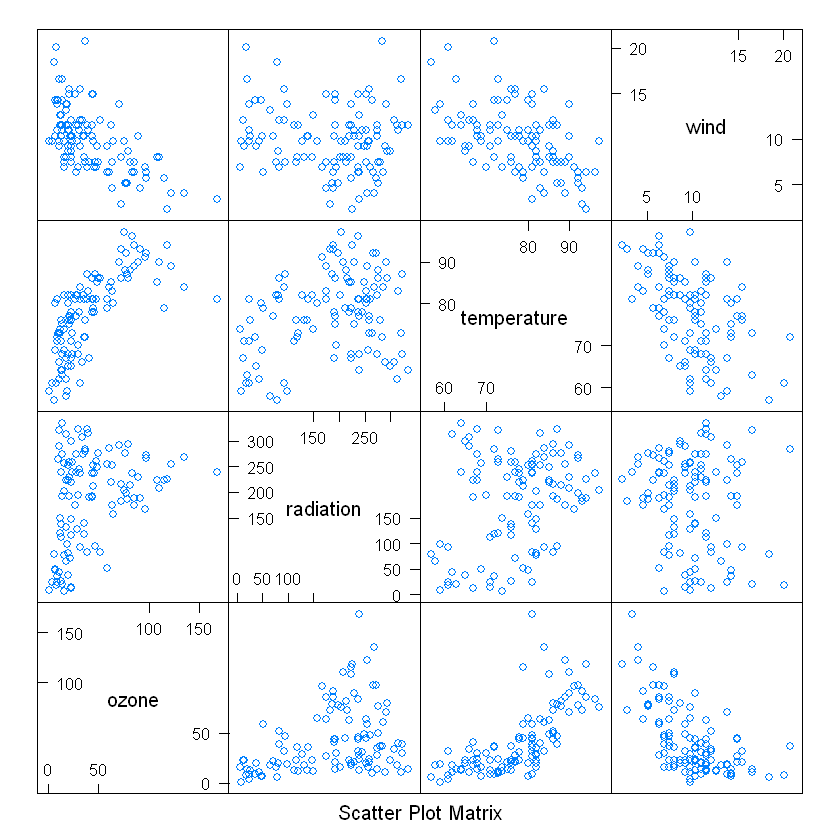

In [47]:
#See all the relationship with each column

splom(~ environmental)

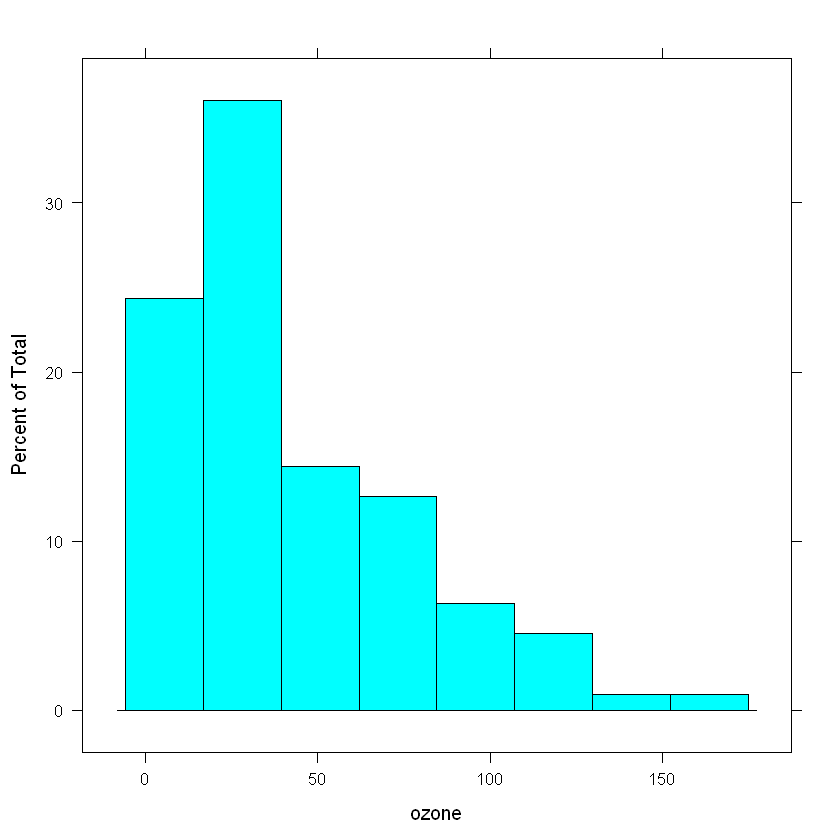

In [48]:
# when we want to see the distribution of the data , use histogram

histogram( ~ ozone , data= environmental)

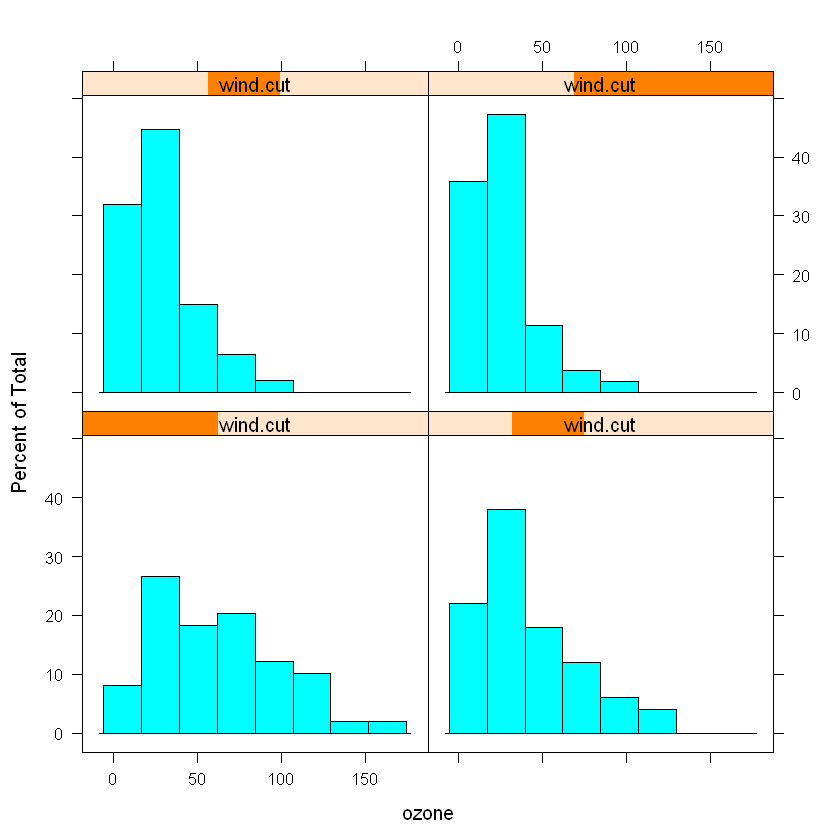

In [51]:
#Let's observe the distribution of ozone according to the different range of ozone

histogram( ~ ozone|wind.cut , data= environmental)

It seems as the power of the wind get stronger, the level of ozone goes down. Extreme values of ozone is observed more as the level of wind decreases.

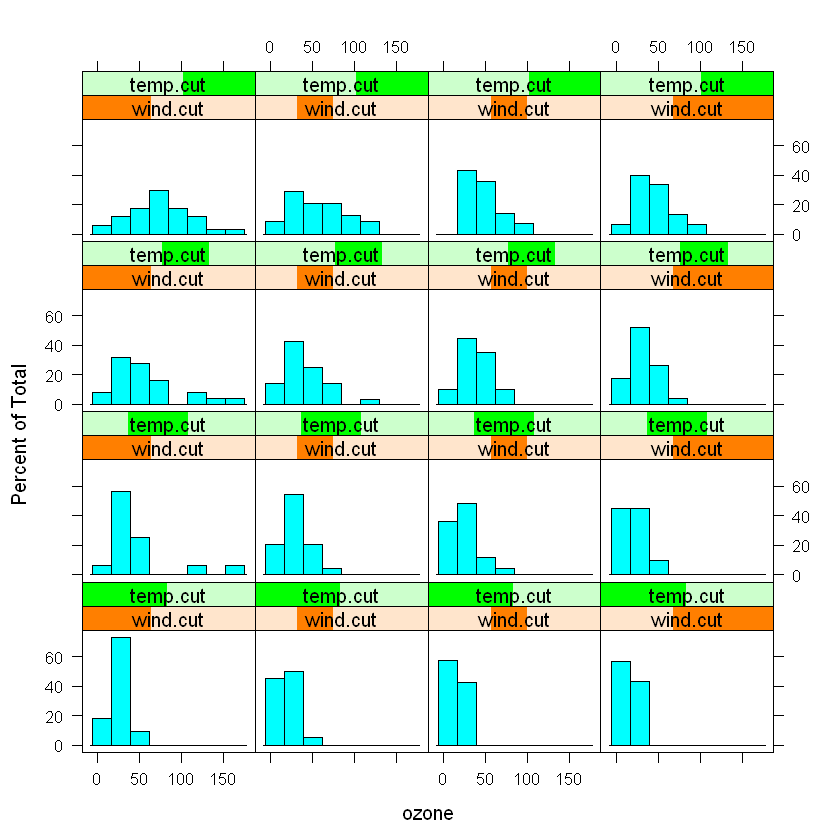

In [57]:
histogram( ~ ozone|wind.cut*temp.cut , data= environmental)

The level of the ozone has the negative relationship  with the power of the wind and positive relationship with the temperature.